In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

# Description
* Exercise for implementing various models from scikit.
* Additional concepts tried: pipelines, grid search (for hyperparameters), voting ensambles/classifiers.
* All results are displayed in a matplotlib bar chart.

# Data description
* Numerical data about the water features from various countries.
* Class to predict - 'Potability' (binary)
* https://www.kaggle.com/datasets/adityakadiwal/water-potability

# Libraries used and their references
- https://scikit-learn.org/stable/user_guide.html
- https://pandas.pydata.org/docs/
- https://matplotlib.org/stable/api/index

In [3]:
seed = 42 # for reproducability
df = pd.read_csv("..\\..\\data\\water_potability.csv")

# Values which we will use to predict
xcols = ['ph', 'Hardness', 'Solids', 'Chloramines',
        'Conductivity', 'Organic_carbon', 'Trihalomethanes',
        'Turbidity', 'Sulfate']

ycol = 'Potability' # The (binary) value to predict

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# categorical_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent'))
# ])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, xcols)
    #('cat', categorical_transformer, ycol)
])

# 70% - training data, 30% - leftover
train, test0 = train_test_split(df, test_size=0.3, random_state=seed)
# (from the 30%) 15% - validation data (for model tuning), 15% - testing data (final evaluation)
val, test = train_test_split(test0, test_size=0.5, random_state=seed)

all_names = []
all_perf = {'Accuracy':[],
            'F1 Score':[]}

def make_pipe(model):
    return Pipeline([
        ('preproc', preprocessor),
        ('class', model)
    ])

## Confusion matrix
 ["correct guess of 0"     "0 missclassified as 1"]  
 ["1 missclassified as 0"  "correct guess of 1"   ]

## Accuracy
- "accuracy" = "correct predictions" / "total samples"

## F1 score - measure of the models accuracy that tells us how well
- It is able to define the right class, as well as avoid making mistakes.
- F1 = 2x [ (precision * recall) / (precision + recall) ]
- T/F - True/False, P/N - False/Negative
- Precision = TP / (TP + FP)
- Recall    = TP / (TP + FN)
- Ranges: 0-0.5 = "sturggles to find 0"
-         0.7-1.0 = "good balence of precision and recall"

## Classification report
- support - count of actual cases of the class
- macro avg - average of precision, recall and F1 without considering class imbalence'
- weighted avg - macro avg BUT weighted by class sizes

In [4]:
def train_and_display_stats(model, name, all_names, all_perf):
    print("\n", name, ":")
    model.fit(train[xcols], train[ycol]) # trains the given model using training data
    preds = model.predict(val[xcols]) # uses the trained model to make predictions on the validation set

    #print(confusion_matrix(val[ycol], preds))
    #print("Accuracy", accuracy_score(val[ycol], preds))
    #print("F1", f1_score(val[ycol], preds, pos_label=0))
    print(classification_report(val[ycol], preds))

    all_names.append(name)
    all_perf['Accuracy'].append(accuracy_score(val[ycol], preds))
    all_perf['F1 Score'].append(f1_score(val[ycol], preds, pos_label=0))

# Model training

In [5]:
# Logistic - determines a function that ranges from 0 to 1
# When the given predictors are passed as the variables, they are applied to the function.
# If the gotten value proceeds the selected threshold (0.5), then the value is selected.
# 0 - from 0 to >0.5, 1 - from =0.5 to 1
from sklearn.linear_model import LogisticRegression
lr = make_pipe(LogisticRegression(intercept_scaling=0.5, max_iter=10000, class_weight='balanced', random_state=41))
name = "Logistic Regression"
train_and_display_stats(lr, name, all_names, all_perf)


 Logistic Regression :
              precision    recall  f1-score   support

           0       0.64      0.50      0.56       310
           1       0.37      0.51      0.43       181

    accuracy                           0.50       491
   macro avg       0.50      0.50      0.49       491
weighted avg       0.54      0.50      0.51       491



In [6]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = make_pipe(RandomForestClassifier(random_state=seed))
name = "Random forest classifier"
train_and_display_stats(rfc, name, all_names, all_perf)


 Random forest classifier :
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       310
           1       0.61      0.34      0.44       181

    accuracy                           0.68       491
   macro avg       0.65      0.61      0.61       491
weighted avg       0.66      0.68      0.65       491



In [7]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = make_pipe(DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=seed))
name = "Decision tree classifier"
train_and_display_stats(dtc, name, all_names, all_perf)


 Decision tree classifier :
              precision    recall  f1-score   support

           0       0.64      0.99      0.78       310
           1       0.75      0.07      0.12       181

    accuracy                           0.65       491
   macro avg       0.70      0.53      0.45       491
weighted avg       0.68      0.65      0.54       491



In [8]:
# Support vector machine, linear kernel
from sklearn.svm import SVC
svc_linear = make_pipe(SVC(kernel='linear', C=1.0, class_weight='balanced', random_state=seed))
name = "SVM - linear"
train_and_display_stats(svc_linear, name, all_names, all_perf)


 SVM - linear :
              precision    recall  f1-score   support

           0       0.62      0.55      0.59       310
           1       0.36      0.43      0.39       181

    accuracy                           0.51       491
   macro avg       0.49      0.49      0.49       491
weighted avg       0.53      0.51      0.51       491



In [9]:
# Support vector machine, default (rbf) kernel
svc_rbf = make_pipe(SVC(random_state=seed))
name = "SVM - default (rbf)"
train_and_display_stats(svc_rbf, name, all_names, all_perf)


 SVM - default (rbf) :


              precision    recall  f1-score   support

           0       0.69      0.92      0.79       310
           1       0.68      0.30      0.41       181

    accuracy                           0.69       491
   macro avg       0.68      0.61      0.60       491
weighted avg       0.69      0.69      0.65       491



In [10]:
# Support vector machine, non-linear (poly) kernel
svc_poly = make_pipe(SVC(kernel='poly', degree=3, random_state=seed))
name = "SVM - non-linear (poly) kernel"
train_and_display_stats(svc_poly, name, all_names, all_perf)


 SVM - non-linear (poly) kernel :
              precision    recall  f1-score   support

           0       0.64      0.97      0.77       310
           1       0.52      0.06      0.11       181

    accuracy                           0.63       491
   macro avg       0.58      0.51      0.44       491
weighted avg       0.60      0.63      0.53       491



In [11]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = make_pipe(GaussianNB())
name = "Gaussian Naive Bayes"
train_and_display_stats(gnb, name, all_names, all_perf)


 Gaussian Naive Bayes :
              precision    recall  f1-score   support

           0       0.65      0.87      0.75       310
           1       0.49      0.20      0.29       181

    accuracy                           0.63       491
   macro avg       0.57      0.54      0.52       491
weighted avg       0.59      0.63      0.58       491



In [12]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf'],
            'C':[0.1, 1, 10], 'gamma':[1, 0.1, 0.001, 0.0001]}
name = "SVC found with GS"
clf = make_pipe(GridSearchCV(SVC(), parameters))
train_and_display_stats(clf, name, all_names, all_perf)


 SVC found with GS :
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       310
           1       0.68      0.29      0.41       181

    accuracy                           0.69       491
   macro avg       0.68      0.61      0.60       491
weighted avg       0.69      0.69      0.65       491



In [13]:
from sklearn.ensemble import VotingClassifier
# Hard voting - majority vote between each model
est_list_hard = [
    ('svc_rbf', SVC(random_state=seed)),
	('dtc', DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=seed)),
    ('rfc', RandomForestClassifier(random_state=seed))
]
name = "Voting classifier (hard)"
vc_hard = make_pipe(VotingClassifier(estimators=est_list_hard, voting= 'hard'))
train_and_display_stats(vc_hard, name, all_names, all_perf)

# Soft voting - averages the probability score of a class between all models
est_list_soft = [
    ('svc_rbf', SVC(random_state=seed, probability=True)),
	('dtc', DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=seed)),
    ('rfc', RandomForestClassifier(random_state=seed))
]
name = "Voting classifier (soft)"
vc_soft = make_pipe(VotingClassifier(estimators=est_list_soft, voting= 'soft'))
train_and_display_stats(vc_soft, name, all_names, all_perf)


 Voting classifier (hard) :
              precision    recall  f1-score   support

           0       0.69      0.94      0.80       310
           1       0.73      0.27      0.40       181

    accuracy                           0.69       491
   macro avg       0.71      0.61      0.60       491
weighted avg       0.70      0.69      0.65       491


 Voting classifier (soft) :
              precision    recall  f1-score   support

           0       0.69      0.94      0.79       310
           1       0.72      0.28      0.40       181

    accuracy                           0.69       491
   macro avg       0.70      0.61      0.60       491
weighted avg       0.70      0.69      0.65       491



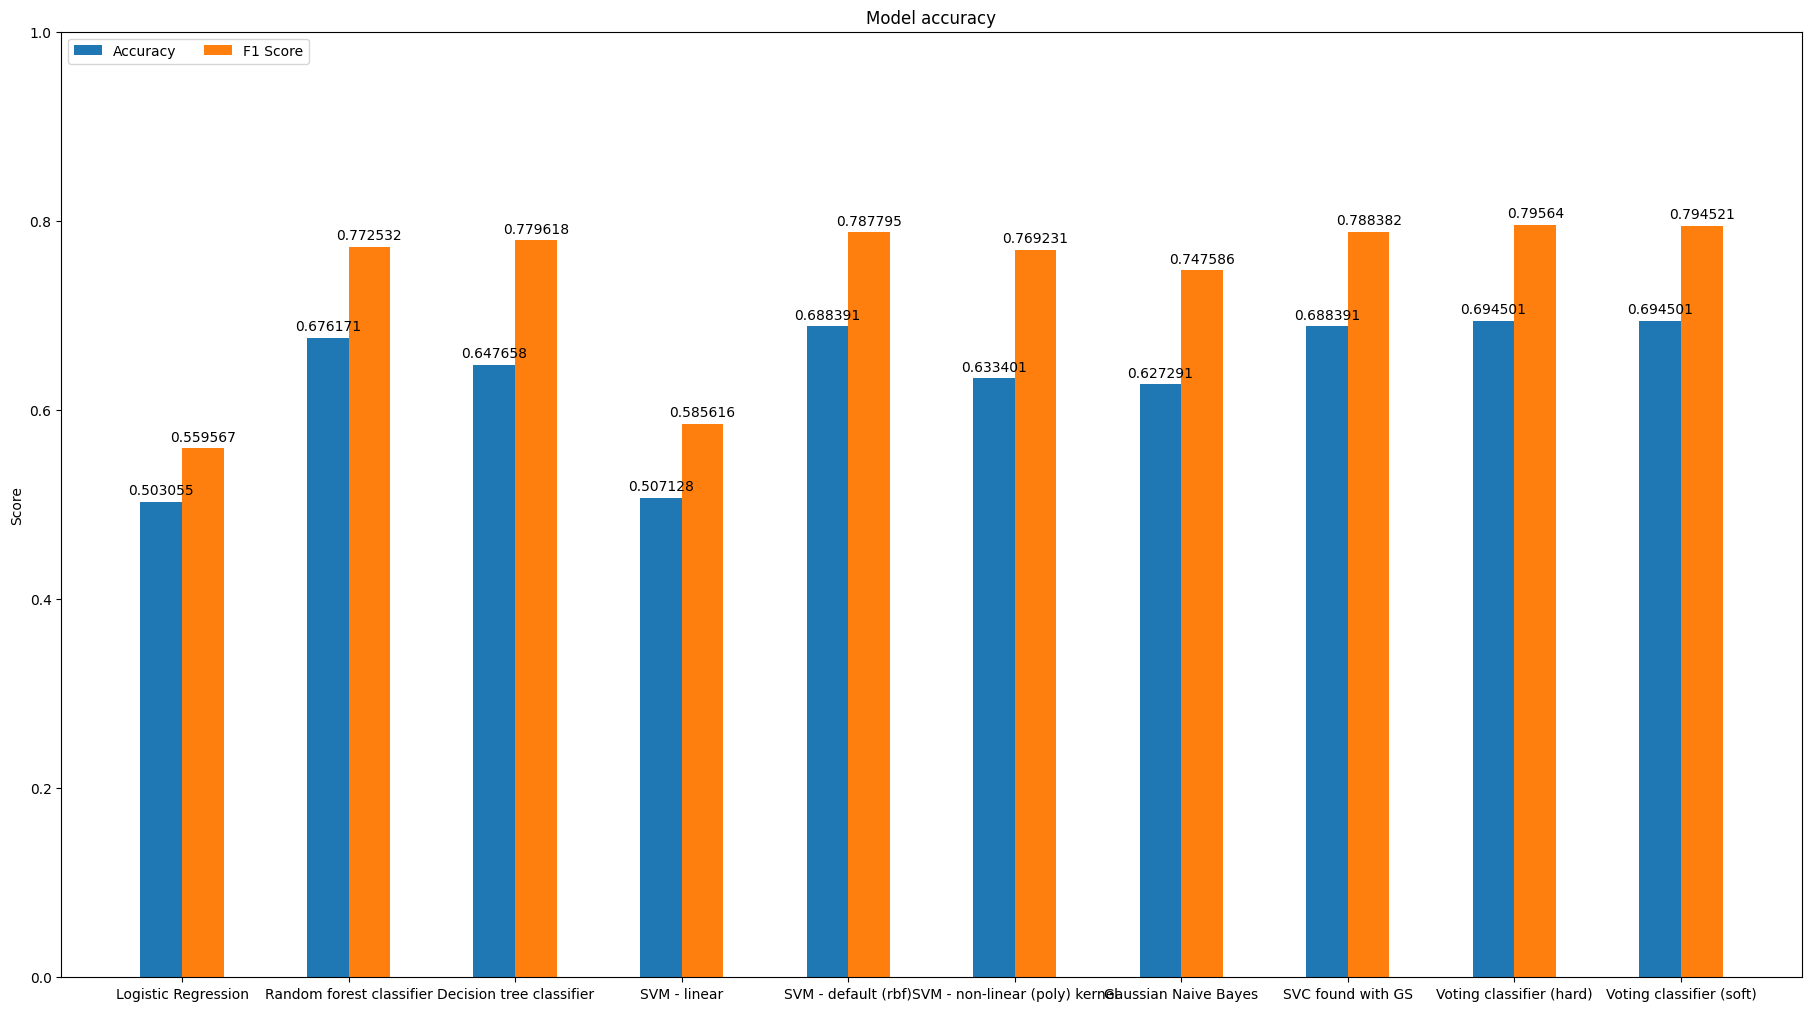

In [14]:
# print(all_names)
# print(all_perf)

x = np.arange(len(all_names))
width = 0.25
multiplier = 0.5

fig, ax = plt.subplots(layout = 'constrained', figsize=(18, 10))

for attribute, measurement in all_perf.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label = attribute)
    ax.bar_label(rects, padding = 3)
    multiplier +=1

ax.set_ylabel('Score')
ax.set_title('Model accuracy')
ax.set_xticks(x + width, all_names)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 1)

plt.show()